In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from seminartools.data import read_merged
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel
from seminartools.models.utils import make_oos_predictions

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
df = read_merged().reset_index()
df

c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:173: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:409: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate


,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [4]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

In [5]:
preds_ao = make_oos_predictions(lambda: FourQuarterAverageModel(), df,tss,progress=True)
preds_ao

Splits: 100%|██████████| 5/5 [00:00<00:00,  7.30it/s]


,date,country,inflation
0,2000-01-01,Australia,0.004734
1,2000-01-01,Belgium,0.004127
2,2000-01-01,Canada,0.005831
3,2000-01-01,Denmark,0.007820
4,2000-01-01,France,0.000000
...,...,...,...
1829,2023-01-01,Sweden,0.027675
1830,2023-01-01,Switzerland,0.007345
1831,2023-01-01,Türkiye,NaN
1832,2023-01-01,United Kingdom,NaN


In [6]:
preds_ar = make_oos_predictions(lambda: ARMAXModel(max_p = 2, max_q = 0), df, tss, progress = True, num_cores = 5)
preds_ar

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Splits: 100%|██████████| 5/5 [00:00<00:00, 91.60it/s]


,date,country,inflation
0,1999-04-01,Japan,0.007393
1,2000-01-01,Canada,0.005906
2,2000-01-01,United States,0.007314
3,2000-01-01,Australia,0.008921
4,2000-01-01,New Zealand,0.004144
...,...,...,...
1516,2023-01-01,Norway,0.001250
1517,2023-01-01,Belgium,0.011892
1518,2023-01-01,Korea,0.006259
1519,2023-01-01,South Africa,0.012260


In [7]:
preds_ucsv = make_oos_predictions(
    lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False, pointwise_aggregation_method="distribution"),
    df,
    tss,
    progress=True,
    num_cores = 1
)
preds_ucsv

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x000002A9D10F6910>)


100%|██████████| 20/20 [00:00<00:00, 32.31it/s]


Fitted!


Splits: 100%|██████████| 5/5 [10:27<00:00, 125.48s/it]


,inflation,country,date
0,"{'pdf': [6.192539607764681e-06, 6.203211710508...",Japan,1999-04-01
1,"{'pdf': [1.6604364044992458e-06, 1.65920695032...",Canada,2000-01-01
2,"{'pdf': [1.6004472358311552e-06, 1.59999226442...",United States,2000-01-01
3,"{'pdf': [1.5595074304983877e-06, 1.57039537242...",Australia,2000-01-01
4,"{'pdf': [2.891568930510582e-06, 2.890067381559...",New Zealand,2000-01-01
...,...,...,...
1829,"{'pdf': [2.3096184825359023e-06, 2.30865135741...",Norway,2023-01-01
1830,"{'pdf': [2.4518789813945366e-06, 2.45743597229...",Belgium,2023-01-01
1831,"{'pdf': [1.2012901622688804e-06, 1.20075411320...",Korea,2023-01-01
1832,"{'pdf': [1.8326822794700766e-06, 1.83201476278...",South Africa,2023-01-01


In [8]:
preds_ucsv_ss = make_oos_predictions(
    lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True, pointwise_aggregation_method="distribution"),
    df,
    tss,
    progress=True,
    num_cores = 1
)
preds_ucsv_ss

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x000002A9CE4B9890>)


100%|██████████| 20/20 [00:00<00:00, 130.11it/s]


Fitted!


Splits: 100%|██████████| 5/5 [16:42<00:00, 200.42s/it]


,inflation,country,date
0,"{'pdf': [-4.4525962224574274e-20, 2.8941875445...",Japan,1999-04-01
1,"{'pdf': [3.313242103732274e-19, 5.963835786718...",Canada,2000-01-01
2,"{'pdf': [6.906289050072455e-20, 1.381257810014...",United States,2000-01-01
3,"{'pdf': [2.0160646631656438e-12, 4.80153347745...",Australia,2000-01-01
4,"{'pdf': [-5.535519341467608e-19, -8.7402936970...",New Zealand,2000-01-01
...,...,...,...
1829,"{'pdf': [1.5713707717769152e-12, 3.38035217877...",Norway,2023-01-01
1830,"{'pdf': [6.91766202794854e-19, 2.5941232604807...",Belgium,2023-01-01
1831,"{'pdf': [2.1245516676407648e-19, 7.08183889213...",Korea,2023-01-01
1832,"{'pdf': [6.263195838189284e-19, 5.010556670551...",South Africa,2023-01-01


In [9]:
preds_db = make_oos_predictions(
    lambda: DistanceModel(pointwise_aggregation_method="distribution"),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds_db

Splits: 100%|██████████| 5/5 [00:00<00:00, 134.87it/s]


,country,inflation,date
0,Australia,"{'pdf': [1.6296182353812256e-06, 1.63663428990...",2000-01-01
1,Belgium,"{'pdf': [2.59703484145384e-06, 2.6307737083921...",2000-01-01
2,Canada,"{'pdf': [2.342706466989705e-06, 2.361418414597...",2000-01-01
3,Denmark,"{'pdf': [1.44634521971643e-06, 1.4463445225395...",2000-01-01
4,Italy,"{'pdf': [1.7271823985675522e-06, 1.73959810670...",2000-01-01
...,...,...,...
1648,South Africa,"{'pdf': [1.6124893025611085e-06, 1.61640019001...",2023-01-01
1649,Spain,"{'pdf': [2.240623881322429e-06, 2.261167880646...",2023-01-01
1650,Sweden,"{'pdf': [1.547649245434769e-06, 1.548789402078...",2023-01-01
1651,Switzerland,"{'pdf': [4.249433441778499e-06, 4.289418843326...",2023-01-01


In [10]:
preds_re = make_oos_predictions(
    lambda: RandomEffectsModel(pointwise_aggregation_method="distribution"),
    df,
    tss,
    progress=True,
    num_cores = 5
)

Splits: 100%|██████████| 5/5 [00:00<00:00, 315.30it/s]


In [114]:
pred_ucsv_high = preds_ucsv.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
pred_ucsv_ss_high = preds_ucsv_ss.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
pred_db_high = preds_db.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
pred_re_high = preds_re.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
pred_ao_high = preds_ao.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
pred_ar_high = preds_ar.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
actual_inflation_high = df.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]

C:\Users\vandi\AppData\Local\Temp\ipykernel_19708\139980374.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  pred_ucsv_high = preds_ucsv.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
C:\Users\vandi\AppData\Local\Temp\ipykernel_19708\139980374.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  pred_ucsv_ss_high = preds_ucsv_ss.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
C:\Users\vandi\AppData\Local\Temp\ipykernel_19708\139980374.py:3: FutureWarning: The behavior of 'isin' with dtype=datet

In [115]:
pred_ucsv_stable = preds_ucsv.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
pred_ucsv_ss_stable = preds_ucsv_ss.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
pred_db_stable = preds_db.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
pred_re_stable = preds_re.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
pred_ao_stable = preds_ao.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
pred_ar_stable = preds_ar.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
actual_inflation_stable = df.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]

C:\Users\vandi\AppData\Local\Temp\ipykernel_19708\2706273888.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  pred_ucsv_stable = preds_ucsv.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
C:\Users\vandi\AppData\Local\Temp\ipykernel_19708\2706273888.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  pred_ucsv_ss_stable = preds_ucsv_ss.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
C:\Users\vandi\AppData\Local\Temp\ipykernel_19708\2706273888.py:3: FutureWarning: The behavior of 'isin' with dtyp

In [116]:
import numpy as np
maxVal_high = max(max(pred_ucsv_high["inflation_grid"]),max(pred_ucsv_ss_high["inflation_grid"]),max(pred_db_high["inflation_grid"]), max(pred_re_high["inflation_grid"]))
minVal_high = min(min(pred_ucsv_high["inflation_grid"]),min(pred_ucsv_ss_high["inflation_grid"]), min(pred_db_high["inflation_grid"]), min(pred_re_high["inflation_grid"]))
x_axis_high = np.linspace(minVal_high,maxVal_high,1999)
maxVal_stable = max(max(pred_ucsv_stable["inflation_grid"]),max(pred_ucsv_ss_stable["inflation_grid"]), max(pred_db_stable["inflation_grid"]),max(pred_re_stable["inflation_grid"]))
minVal_stable = min(min(pred_ucsv_stable["inflation_grid"]), min(pred_ucsv_ss_stable["inflation_grid"]), min(pred_db_stable["inflation_grid"]), min(pred_re_stable["inflation_grid"]))
x_axis_stable = np.linspace(minVal_stable,maxVal_stable, 1999)

In [117]:
import numpy as np
pred_ucsv_high_plot = np.interp(x_axis_high, pred_ucsv_high["inflation_grid"], pred_ucsv_high["pdf"])
pred_ucsv_ss_high_plot = np.interp(x_axis_high, pred_ucsv_ss_high["inflation_grid"], pred_ucsv_high["pdf"])
pred_db_high_plot = np.interp(x_axis_high, pred_db_high["inflation_grid"], pred_db_high["pdf"])
pred_re_high_plot = np.interp(x_axis_high, pred_re_high["inflation_grid"], pred_re_high["pdf"])

pred_ucsv_stable_plot = np.interp(x_axis_stable, pred_ucsv_stable["inflation_grid"], pred_ucsv_stable["pdf"])
pred_ucsv_ss_stable_plot = np.interp(x_axis_stable, pred_ucsv_ss_stable["inflation_grid"], pred_ucsv_ss_stable["pdf"])
pred_db_stable_plot = np.interp(x_axis_stable, pred_db_stable["inflation_grid"], pred_db_stable["pdf"])
pred_re_stable_plot = np.interp(x_axis_stable, pred_re_stable["inflation_grid"], pred_re_stable["pdf"])

In [118]:
#normalize to densities
from scipy.integrate import simps
def normalize_density(density):
    area = simps(density)
    return density / area

pred_ucsv_stable_plot = normalize_density(pred_ucsv_stable_plot)
pred_ucsv_ss_stable_plot = normalize_density(pred_ucsv_ss_stable_plot)
pred_re_stable_plot = normalize_density(pred_re_stable_plot)
pred_db_stable_plot = normalize_density(pred_db_stable_plot)

pred_ucsv_high_plot = normalize_density(pred_ucsv_high_plot)
pred_ucsv_ss_high_plot = normalize_density(pred_ucsv_ss_high_plot)
pred_re_high_plot = normalize_density(pred_re_high_plot)
pred_db_high_plot = normalize_density(pred_db_high_plot)

C:\Users\vandi\AppData\Local\Temp\ipykernel_19708\2481244318.py:4: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area = simps(density)


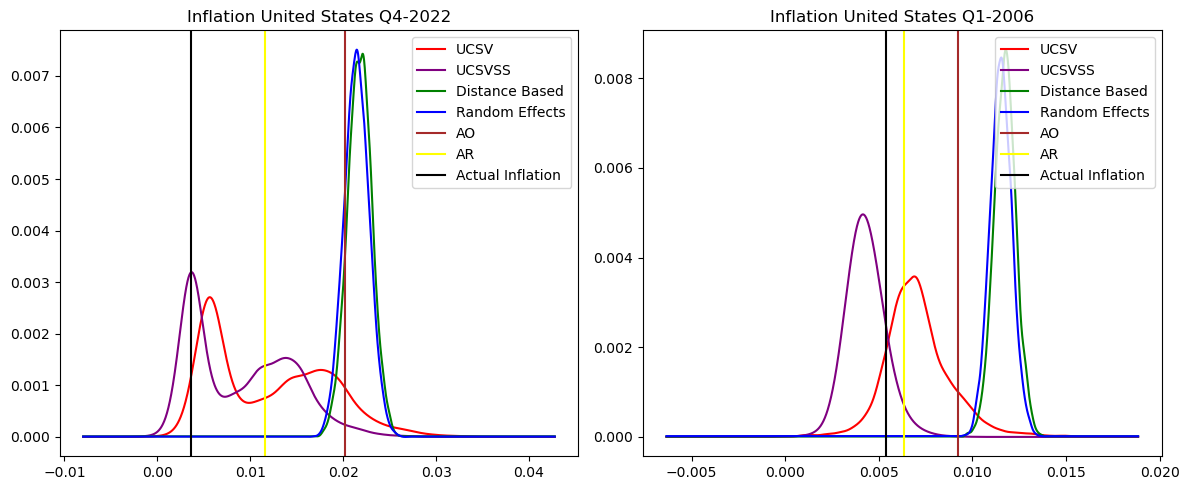

In [119]:
import matplotlib.pyplot as plt
figures, axes = plt.subplots(1,2, figsize = (12,5))

axes[0].plot(
    x_axis_high,
    pred_ucsv_high_plot,
    label = "UCSV",
    color = "red"
)
axes[0].plot(
    x_axis_high,
    pred_ucsv_ss_high_plot,
    label = "UCSVSS",
    color = "purple"
)
axes[0].plot(
    x_axis_high,
    pred_db_high_plot,
    label = "Distance Based",
    color = "green"
)
axes[0].plot(
    x_axis_high,
    pred_re_high_plot,
    label = "Random Effects",
    color = "blue"
)
axes[0].axvline(pred_ao_high, color = "brown", label = "AO")
axes[0].axvline(pred_ar_high,color = "yellow", label = "AR")
axes[0].axvline(actual_inflation_high, color = "black", label = "Actual Inflation")
axes[0].legend(loc = "upper right")
axes[0].set_title("Inflation United States Q4-2022")

axes[1].plot(
    x_axis_stable,
    pred_ucsv_stable_plot,
    label = "UCSV",
    color = "red"
)
axes[1].plot(
    x_axis_stable,
    pred_ucsv_ss_stable_plot,
    label = "UCSVSS",
    color = "purple"
)
axes[1].plot(
    x_axis_stable,
    pred_db_stable_plot,
    label = "Distance Based",
    color = "green"
)
axes[1].plot(
    x_axis_stable,
    pred_re_stable_plot,
    label = "Random Effects",
    color = "blue"
)
axes[1].axvline(pred_ao_stable, color = "brown", label = "AO")
axes[1].axvline(pred_ar_stable,color = "yellow", label = "AR")
axes[1].axvline(actual_inflation_stable, color = "black", label = "Actual Inflation")
axes[1].set_title("Inflation United States Q1-2006")
axes[1].legend(loc = "upper right")
plt.tight_layout()